<a href="https://colab.research.google.com/github/anand176/JackFruit__Ripeness-Detection-System/blob/master/CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import tensorflow as tf

# Path to your model file
model_path = '/content/drive/MyDrive/jackfruit_ripeness.h5'

# Load the model
model = tf.keras.models.load_model(model_path)

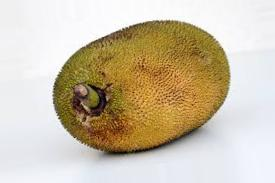

In [3]:
from google.colab.patches import cv2_imshow
import cv2

# Attempt to read the image
input_image = cv2.imread('/content/ripe_0_33.jpeg')

# Check if image reading was successful
if input_image is not None:
    # Display the image
    cv2_imshow(input_image)
else:
    print("Failed to read the image file. Please check the file path and format.")

In [6]:
import numpy as np

In [16]:
import os
tlabels=[]
c1,c2=0,0
file_names=os.listdir('/content/drive/MyDrive/ripen')
# print(file_names)
for file in file_names:

    # if file[0]=='r':
        # c1=c1+1
      tlabels.append(1)
      c1=c1+1
file_names=os.listdir('/content/drive/MyDrive/unripen')
for file in file_names:

    # if file[0]=='r':
        # c1=c1+1
      tlabels.append(0)
      c2=c2+1

print(c1,c2)
    # else:
    #     c2=c2+1
    #     labels.append(0)
# print(tlabels)

64 64


In [18]:
from ast import In
import cv2
import numpy as np

plabel = []
file_names=os.listdir('/content/drive/MyDrive/ripen')
# Assuming `file_names` contains the list of filenames in your directories
for file in file_names:
    input_image_path = '/content/drive/MyDrive/ripen/' + file
    input_image = cv2.imread(input_image_path)
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
    input_prediction = model.predict(image_reshaped)
    if input_prediction[0][0] > 0.5:
        plabel.append(1)
    else:
        plabel.append(0)
file_names=os.listdir('/content/drive/MyDrive/unripen')
for file in file_names:
    input_image_path = '/content/drive/MyDrive/unripen/' + file
    input_image = cv2.imread(input_image_path)
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
    input_prediction = model.predict(image_reshaped)
    if input_prediction[0][0] > 0.5:
        plabel.append(1)
    else:
        plabel.append(0)

print(plabel)


1/1 [==============================] - 0s 55ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example true labels and predicted labels
true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[58  6]
 [ 5 59]]


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Example true labels and predicted labels
true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9140625
Precision: 0.9076923076923077
Recall: 0.921875
F1 Score: 0.9147286821705427


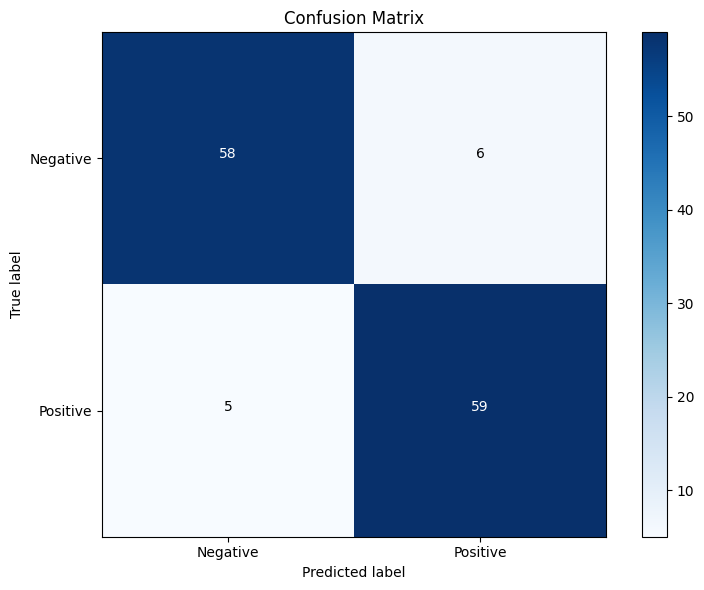

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Example true labels and predicted labels
true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

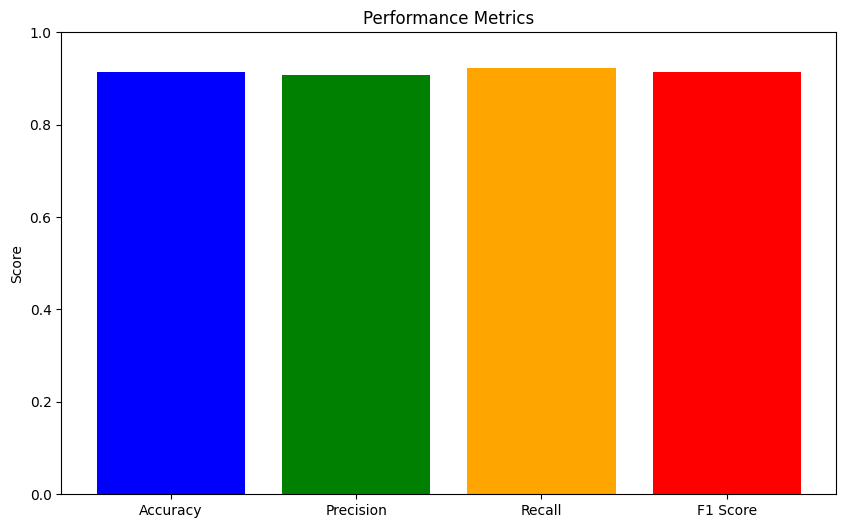

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Example true labels and predicted labels
true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()